## Direct Load and Train AGNews and BBCNews

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import os
import pickle
from IPython.display import display, HTML

In [5]:
# import AGNews Data
with open('/content/gdrive/MyDrive/Extra Docs/Clustering/ag_files/cleaned_df.pickle', 'rb') as f:
    ag_data = pickle.load(f)

with open('/content/gdrive/MyDrive/Extra Docs/Clustering/ag_files/lemmatized_texts.pickle', 'rb') as f:
    ag_texts = pickle.load(f)

display(HTML(ag_data.head(5).to_html()))
print(ag_texts[:5])

,Description
0,reuters shortsellers wall streets dwindling band ultracynics seeing green again
1,reuters private investment firm carlyle group reputation making welltimed occasionally controversial plays defense industry quietly placed bets another part market
2,reuters soaring crude prices plus worries economy outlook earnings expected hang stock market next week depth summer doldrums
3,reuters authorities halted oil export flows main pipeline southern iraq intelligence showed rebel militia could strike infrastructure oil official said saturday
4,afp tearaway world oil prices toppling records straining wallets present new economic menace barely three months presidential elections


[['shortsellers', 'wall', 'street', 'dwindling', 'band', 'ultracynics', 'seeing', 'green'], ['private', 'investment', 'firm', 'carlyle', 'group', 'reputation', 'making', 'welltimed', 'occasionally', 'controversial', 'play', 'defense', 'industry', 'quietly', 'placed', 'bet', 'another', 'part', 'market'], ['soaring', 'crude', 'price', 'plus', 'worry', 'economy', 'outlook', 'earnings', 'expected', 'hang', 'stock', 'market', 'next', 'week', 'depth', 'summer', 'doldrums'], ['authority', 'halted', 'oil', 'export', 'flow', 'main', 'pipeline', 'southern', 'iraq', 'intelligence', 'showed', 'rebel', 'militia', 'could', 'strike', 'infrastructure', 'oil', 'official', 'said', 'saturday'], ['afp', 'tearaway', 'world', 'oil', 'price', 'toppling', 'record', 'straining', 'wallet', 'present', 'new', 'economic', 'menace', 'barely', 'three', 'month', 'presidential', 'election']]


In [6]:
# import BBC News Data
with open('/content/gdrive/MyDrive/Extra Docs/Clustering/bbc_files/cleaned_df.pickle', 'rb') as f:
    bbc_data = pickle.load(f)

with open('/content/gdrive/MyDrive/Extra Docs/Clustering/bbc_files/lemmatized_texts.pickle', 'rb') as f:
    bbc_texts = pickle.load(f)

display(HTML(bbc_data.head(5).to_html()))
print(bbc_texts[:5])

,Unnamed: 0,Description
0,0,yiannis papadoyiannakis head greek olympic team athens games last year also testified tribunal along greek sports officials athletesthe fivemember tribunal assembled hellenic association amateur athletics also examining allegations kenteris thanou avoided tests tel aviv chicago gamesthey given provisional suspensions athletics ruling body iaaf december failing take drugs tests athens olympicstzekos also banned two years iaafgreek sprinters kostas kenteris katerina thanou appeared independent tribunal decide bans standall three repeatedly denied allegations also charged greek prosecutor face trial dopingrelated chargesthere also evidence proves fact client persecutedbut kenteris lawyer gregory ioannidis told bbc sport earlier week confident sprinters would cleared charges failing give information location refusing submit testingi believe tribunal reach decision uphold standing institution said papadoyiannakis
1,1,mr conte chose make unsubstantiated allegations television marion jones demanded take passed lie detector examinationmarion jones filed lawsuit defamation balco boss victor conte following allegations gave performanceenhancing drugsjones investigation steroid use antidoping agency continually denied ever taking illegal substances since investigated balco scandal although praised zinc supplement conte marketedafter abc television program earlier month jones lawyer richard nicholls said marion steadfastly maintained position throughout never ever used performanceenhancing drugsvictor conte man facing count federal indictment marion jones one americas decorated female athletesbut davies stressed would american authorities decide whether take action jones light contes television interview world governing body would monitor situation closelyconte whose company centre doping investigation made claims television programmemr conte simply crediblewe challenge submit lie detector procedure marion jones passedcommunications director nick davies said iaaf would seek contact conte for information
2,2,andy roddick player put real resistance wimbledon federers performance lleyton hewitt open final breathtakingand anastasia myskina became first russian woman win grand slam french open two followed wimbledon openfederer began year world number one holder wimbledon masters cup titles set conquering new groundhenman broke new ground reaching semis clay french open stunning effort also opendavenport strong favourite open but hampered injury lost powerful unflappable kuznetsova semisthe year started regulation fashion justine heninhardenne beat compatriot kim clijsters australian opena virus ruined rest heninhardennes year although fit enough win olympic gold clijsters even miserable the major letdown thirdround loss gustavo kuerten french open roland garros main target kuznetsova went give dementieva another grand slam final thrashing latters wayward serve becoming one talking points yearin absence myskina thrashed elena dementieva historic woeful allrussian final french opena quarterfinal defeat mario ancic wimbledon disappointing limp manner britons defeat remains optimistic going next yearhis victory houston proved th successive win final open era record
3,3,greek sprinters kostas kenteris katerina thanou expected find wednesday banned missing drugs tests summerkenteris gold m sydney olympics thanou silver mthe greek authorities also brought criminal charges sprinters avoiding drugs test faking accidentbut kenteris thanou went skip tests tel aviv chicago decided fly back greece earlykenteris thanou appeal decision court arbitration sportkenteris thanou could suspended two years
4,4,but umaga england saturdays irb rugby aid match also backed new zealand win threetest series lionsumaga meet odriscoll saturdays rugby aid match twickenham irish captain leading northern hemisphere sideall blacks captain tama umaga warned british irish lions fearsome opponents yet ahead summer tourthe yearold admitted interest lio

[['yiannis', 'papadoyiannakis', 'head', 'greek', 'olympic', 'team', 'athens', 'game', 'last', 'year', 'also', 'testified', 'tribunal', 'along', 'greek', 'sport', 'official', 'athletesthe', 'fivemember', 'tribunal', 'assembled', 'hellenic', 'association', 'amateur', 'athletics', 'also', 'examining', 'allegation', 'kenteris', 'thanou', 'avoided', 'test', 'tel', 'aviv', 'chicago', 'gamesthey', 'given', 'provisional', 'suspension', 'athletics', 'ruling', 'body', 'iaaf', 'december', 'failing', 'take', 'drug', 'test', 'athens', 'olympicstzekos', 'also', 'banned', 'two', 'year', 'iaafgreek', 'sprinter', 'kostas', 'kenteris', 'katerina', 'thanou', 'appeared', 'independent', 'tribunal', 'decide', 'ban', 'standall', 'three', 'repeatedly', 'denied', 'allegation', 'also', 'charged', 'greek', 'prosecutor', 'face', 'trial', 'dopingrelated', 'chargesthere', 'also', 'evidence', 'prof', 'fact', 'client', 'persecutedbut', 'kenteris', 'lawyer', 'gregory', 'ioannidis', 'told', 'bbc', 'sport', 'earlier', '

In [7]:
texts = ag_texts + bbc_texts

In [8]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(texts)
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus[:5])

Dictionary<82505 unique tokens: ['band', 'dwindling', 'green', 'seeing', 'shortsellers']...>
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(18, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(37, 1), (54, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]]


In [9]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

# fit LDA model
transcripts_topics = LdaModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=4,
                           alpha='auto', ##Learns an asymmetric prior from the corpus;
##1D array of length=number of expected topics that expresses our a-priori belief for the each topics’ probability.
                           passes=100 ##Number of passes through the corpus during training.
                             ) 
print(transcripts_topics)
# print out first 5 topics
for i, topic in enumerate(transcripts_topics.print_topics(4)):
    print ('%d: %s\n'%(i+1, topic))

LdaModel<num_terms=82505, num_topics=4, decay=0.5, chunksize=2000>
1: (0, '0.021*"said" + 0.011*"year" + 0.009*"company" + 0.008*"oil" + 0.008*"new" + 0.007*"price" + 0.007*"sale" + 0.006*"stock" + 0.006*"market" + 0.006*"bank"')

2: (1, '0.010*"game" + 0.007*"first" + 0.006*"new" + 0.006*"last" + 0.006*"year" + 0.005*"one" + 0.005*"team" + 0.005*"point" + 0.005*"season" + 0.005*"win"')

3: (2, '0.021*"said" + 0.007*"country" + 0.007*"government" + 0.007*"president" + 0.006*"minister" + 0.006*"official" + 0.006*"people" + 0.005*"would" + 0.005*"state" + 0.004*"two"')

4: (3, '0.010*"new" + 0.007*"said" + 0.007*"service" + 0.007*"company" + 0.005*"technology" + 0.005*"software" + 0.005*"people" + 0.005*"music" + 0.005*"computer" + 0.005*"system"')



In [10]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 82.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

In [12]:
!pip install pandas

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install "pandas<2.0.0"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 85.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [15]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(transcripts_topics, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
with open('/content/gdrive/MyDrive/Extra Docs/Clustering/topics_apr25_1703.pickle', 'wb') as f:
    pickle.dump(transcripts_topics, f)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)

with open('/content/gdrive/MyDrive/Extra Docs/Clustering/dictionary_apr25_1703.pickle', 'wb') as f:
    pickle.dump(dictionary, f)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
other_texts = [
    ['computer', 'time', 'graph', 'microsoft', 'system', 'technology'],
    ['game', 'point', 'year', 'coach', 'season', 'team'],
    ['president', 'government', 'computer', 'leader', 'world', 'country'],
    ['company', 'stock', 'target', 'million', 'billion']
]

other_corpus = [dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[0]
vector = transcripts_topics[unseen_doc]  # get topic probability distribution for a document
print(vector)

print(transcripts_topics[other_corpus[1]])
print(transcripts_topics[other_corpus[2]])
print(transcripts_topics[other_corpus[3]])

'''
0 - Business
1 - Sports
2 - World
3 - Tech
'''

[(0, 0.024600707), (1, 0.028297866), (2, 0.03177281), (3, 0.9153286)]
[(0, 0.023794873), (1, 0.92061496), (2, 0.03067357), (3, 0.024916572)]
[(0, 0.023800371), (1, 0.027376387), (2, 0.7380732), (3, 0.21075004)]
[(0, 0.90279865), (1, 0.031954557), (2, 0.035939634), (3, 0.029307147)]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=transcripts_topics, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.5913188920140205


In [20]:
perplexity = transcripts_topics.log_perplexity(corpus)
print(f"Perplexity: {perplexity}")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: -8.56764071063874


## Testing Model

In [21]:
!pip install pandas

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import pandas as pd

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
with open('/content/gdrive/MyDrive/Extra Docs/Clustering/ag_files/test.csv', 'rb') as f:
    test_data = pd.read_csv(f)
test_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [26]:
test_data.drop(columns=['Title'], inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
category = []

for i in range(0, test_data.shape[0]):
    if test_data['Class Index'][i] == 1:
        category.append('world')
    elif test_data['Class Index'][i] == 2:
        category.append('sport')
    elif test_data['Class Index'][i] == 3:
        category.append('business')
    else:
        category.append('tech')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
test_data['Categories'] = category

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
test_data.drop(columns=['Class Index'], inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [32]:
import string
import re

def remove_punctuation_digits(text):
  punctuationfree = "".join([i for i in text if i not in string.punctuation and not i.isdigit()])
  return punctuationfree

def remove_stopwords(text):
  text = " ".join([i for i in text.split() if len(i) > 2 and i not in stopwords.words('english')])
  return text

def clean_text(text):
  text = text.replace("/", " ")
  text = text.replace("\\", " ")
  text = remove_stopwords(text)
  text = remove_punctuation_digits(text)
  text = text.lower()
  text = re.sub(' +', ' ', text)
  return text

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
index = test_data.index
for i in index:
    test_data["Description"][i] = clean_text(test_data["Description"][i])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
test_texts = []
lemmatizer = WordNetLemmatizer()

for text in test_data["Description"]:
    lemmatized_words = []
    for word in text.split():
        if("reuter" not in word):
            lemmatized_word = lemmatizer.lemmatize(word)
            if(len(lemmatized_word) > 2 and lemmatized_word not in stopwords.words('english')):
                lemmatized_words.append(lemmatized_word)
    test_texts.append(lemmatized_words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
other_corpus = [dictionary.doc2bow(text) for text in test_texts]

unseen_doc = other_corpus[0]
vector = transcripts_topics[unseen_doc]  # get topic probability distribution for a document
print(vector)

[(0, 0.6479888), (1, 0.10038087), (2, 0.23919074), (3, 0.012439613)]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# april 25 1703 model
op = {
    0: "business",
    1: "sport",
    2: "world",
    3: "tech"
}

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
fin = []

for oc in other_corpus:
    # print(oc)
    res_vec = transcripts_topics[oc]
    max = 0
    ind = -1
    for rv in res_vec:
        if rv[1] > max:
            max = rv[1]
            ind = rv[0]
    fin.append(op[ind])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
rc = 0
wc = 0

for i in range(0, 7600):
    if test_data['Categories'][i] == fin[i]: rc+=1
    else: wc+=1

print(f'rc: {rc}\twc: {wc}')

rc: 6186	wc: 1414


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
print(f'Accuracy: {rc/(rc+wc)}')

Accuracy: 0.8139473684210526


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# for confusion matrix
y_test = []
y_pred = []

for i in range(0, 7600):
    y_test.append(test_data['Categories'][i])
    y_pred.append(fin[i])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


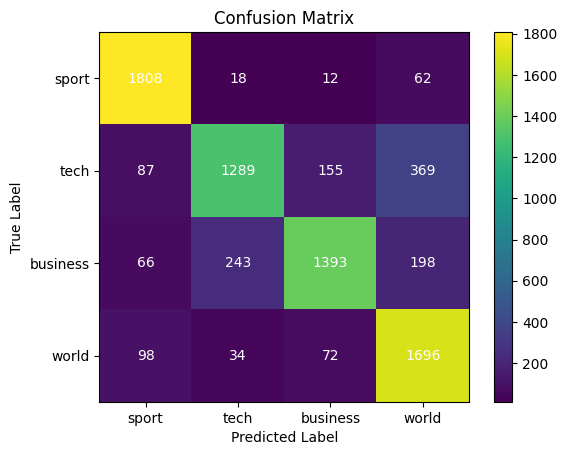

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define class labels
labels = ["sport", "tech", "business", "world"]

# Create label to index mapping
label_to_index = {label: i for i, label in enumerate(labels)}

# Convert labels to indices
y_test_indices = [label_to_index[label] for label in y_test]
y_pred_indices = [label_to_index[label] for label in y_pred]

# Calculate confusion matrix
cm = confusion_matrix(y_test_indices, y_pred_indices)

# Plot confusion matrix
fig, ax = plt.subplots()
# im = ax.imshow(cm, cmap='Blues')
im = ax.imshow(cm)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Loop over data and add text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='w')

# Add axis labels
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Set plot title
ax.set_title('Confusion Matrix')

# Show plot
plt.show()
